In [1]:
import os
import cv2
import math
import time
import numpy as np
from scipy.interpolate import spline
import matplotlib
%matplotlib inline
from matplotlib import pylab as plt
from IPython.display import clear_output
from sklearn.decomposition import PCA 
from os.path import join as pj
from tqdm import tqdm_notebook as tqdm
from joblib import Parallel, delayed

In [2]:
filepath_by_idx = {}

ROOT = '/data/junction'
for idx in range(41, 51):
    filenames = []
    for root, dirs, files in os.walk('{}/{}'.format(ROOT, idx)):
        for file in files:
            filenames.append(pj(root, file))
    candidates = [filename for filename in filenames if os.path.splitext(filename)[1] in ['.avi', '.mkv']]
    if len(candidates) != 1:
        print('! {} Shit candidates {} != 1'.format(idx, len(candidates)))
        for filename in filenames:
            print(filename)
    else:
        filepath_by_idx[idx] = candidates[0]

! 42 Shit candidates 0 != 1


In [3]:
filepath_by_idx

{41: '/data/junction/41/Otstupniki_HDRip_[scarabey.org].avi',
 43: '/data/junction/43/T2.SkyNet.Edition_1992_HDRip__[scarabey.org].avi',
 44: '/data/junction/44/Back.to.the.Future_1_1985_HDRip_[scarabey.org].avi',
 45: "/data/junction/45/Oderjimost'_2014_HDRip__[scarabey.org].avi",
 46: '/data/junction/46/Gladiator.2000.Theatrical.Cut_[scarabey.org].avi',
 47: '/data/junction/47/The.Prestige.2006.XviD.AC3.Dub.HDRip.avi',
 48: '/data/junction/48/Korol.Lev.1994.RUS.BDRip.XviD.AC3.-HQCLUB.avi',
 49: '/data/junction/49/Pomni_HDRip_[scarabey.org].avi',
 50: '/data/junction/50/Apocalypse.Now.1979.Redux.version.HDRip.1,46Gb.MVO(Soyuz).MVO(Pozitiv).ALLFILMS.RG/Apocalypse.Now.1979.Redux.version.HDRip.1,46Gb.MVO(Soyuz).ALLFILMS.RG.avi'}

In [4]:
def just_do_it_for_filepath(filepath):
    brightness = []
    
    cap = cv2.VideoCapture(filepath)
    frame_rate = cap.get(5)  # frame rate
    
    frame_counter = 0
    while cap.isOpened():
        frame_id = cap.get(1)
        ret, frame = cap.read()
        if not ret:
            break

        if frame_id % math.floor(frame_rate) == 0:
            frame_counter += 1

        if frame_id % 2000 == 0:
            grey = 0.2126 * frame[:, :, 0] + 0.7152 * frame[:, :, 1] + 0.0722 * frame[:, :, 2]
            brightness.append(np.average(grey))

    cap.release()
    return np.array(brightness)

48 /data/junction/48/Korol.Lev.1994.RUS.BDRip.XviD.AC3.-HQCLUB.avi


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  if sys.path[0] == '':


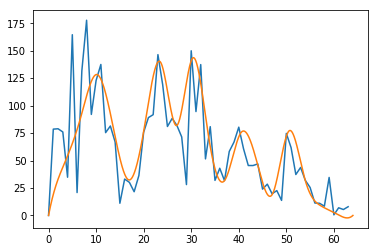

49 /data/junction/49/Pomni_HDRip_[scarabey.org].avi


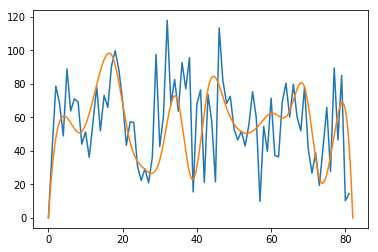

50 /data/junction/50/Apocalypse.Now.1979.Redux.version.HDRip.1,46Gb.MVO(Soyuz).MVO(Pozitiv).ALLFILMS.RG/Apocalypse.Now.1979.Redux.version.HDRip.1,46Gb.MVO(Soyuz).ALLFILMS.RG.avi


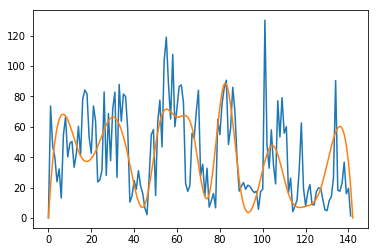

41 /data/junction/41/Otstupniki_HDRip_[scarabey.org].avi


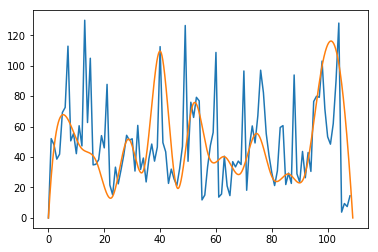

43 /data/junction/43/T2.SkyNet.Edition_1992_HDRip__[scarabey.org].avi


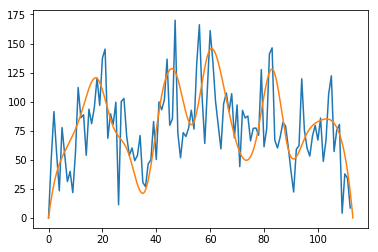

44 /data/junction/44/Back.to.the.Future_1_1985_HDRip_[scarabey.org].avi


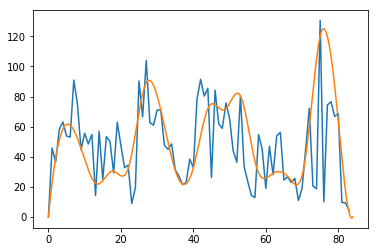

45 /data/junction/45/Oderjimost'_2014_HDRip__[scarabey.org].avi


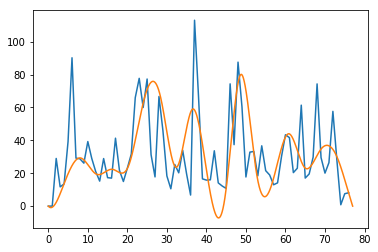

46 /data/junction/46/Gladiator.2000.Theatrical.Cut_[scarabey.org].avi


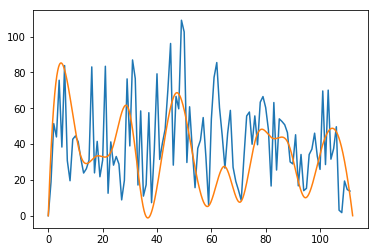

47 /data/junction/47/The.Prestige.2006.XviD.AC3.Dub.HDRip.avi


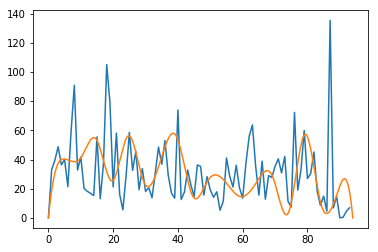

In [5]:
results_for_film = []

for idx, filepath in filepath_by_idx.items():
    print(idx, filepath)
    
    X = just_do_it_for_filepath(filepath)
    
    x_old = np.arange(len(X))
    x_new1 = np.linspace(0, len(X), 20)
    x_new2 = np.linspace(0, len(X), 4000)
    smooth = spline(x_old, X, x_new1)
    smooth = spline(x_new1, smooth, x_new2)
    
    results_for_film.append((idx, X, smooth, np.average(X)))

    plt.plot(X)
    plt.plot(x_new2, smooth)
    plt.show()

In [6]:
import json
results_for_film2 = [(idx, X.tolist(), smooth.tolist(), avgX) for idx, X, smooth, avgX in results_for_film]
with open('brightness 41-50.json', 'w') as f:
    f.write(json.dumps(results_for_film2))